<a href="https://colab.research.google.com/github/sravyamullapudi26/code_alpha_data_SCience/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib


In [ ]:
# Load dataset
df = pd.read_csv('/content/Advertising.csv')

# Display the first 5 rows of the dataset
print("Dataset Preview:")
print(df.head())

# Get dataset information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())


Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Statistical Summary:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.0

In [ ]:
# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop('Sales', axis=1)  # Features (independent variables)
y = df_encoded['Sales']  # Target (dependent variable)

# Display updated features
print("\nUpdated Features:")
print(X.head())



Updated Features:
   Unnamed: 0     TV  Radio  Newspaper
0           1  230.1   37.8       69.2
1           2   44.5   39.3       45.1
2           3   17.2   45.9       69.3
3           4  151.5   41.3       58.5
4           5  180.8   10.8       58.4


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (160, 4)
Testing Set Shape: (40, 4)


In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance:")
print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")



Model Performance:
R2 Score: 0.90
Mean Squared Error: 3.20


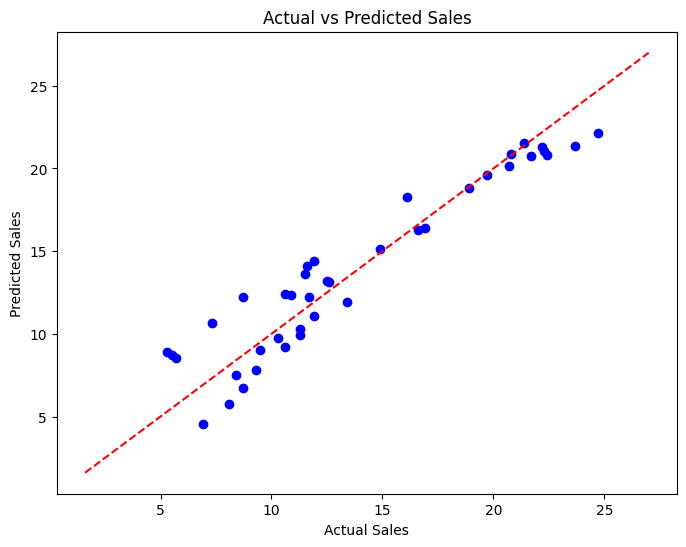

In [ ]:
# Plot Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [ ]:
# Save the model to a file
joblib.dump(model, 'sales_prediction_model.pkl')
print("\nModel saved as 'sales_prediction_model.pkl'")



Model saved as 'sales_prediction_model.pkl'


In [ ]:
# Load the saved model
loaded_model = joblib.load('sales_prediction_model.pkl')

# Example test input (replace values as needed)
test_input = pd.DataFrame([[2500, 1, 0, 0]], columns=X.columns)

# Predict sales for the test input
predicted_sales = loaded_model.predict(test_input)
print("\nPredicted Sales for Test Input:", predicted_sales[0])



Predicted Sales for Test Input: 4.56022053913961
